In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly as ply
import seaborn as sns
import warnings
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
import plotly.io as pio
pio.renderers.default = 'iframe'
pio.templates.default = "plotly_dark"

c:\Users\PRASHANTH\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning:

Blowfish has been deprecated



In [3]:
appdf = pd.read_csv(r"C:\Users\PRASHANTH\Desktop\finalds\appdata_mergefinal11.csv")

In [3]:
#import pandas as pd

 #Assuming 'appDf' is your DataFrame
#appDf = appDf[['NAME_CONTRACT_TYPE_y', 'NAME_CLIENT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
               #'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'OCCUPATION_TYPE',
               #'NAME_GOODS_CATEGORY', 'PRODUCT_COMBINATION', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE',
               #'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE', 'Age Group', 'Work Experience',
               #'AMT_CREDIT_Range', 'AMT_INCOME_TOTAL_Range','NAME_CONTRACT_STATUS']]

 #Export the DataFrame to a CSV file
#appDf.to_csv(r"C:\Users\PRASHANTH\Desktop\finalds\appdata_mergefinal11.csv", index=False)

 #Optionally, print the first few rows of the filtered DataFrame
#print("Filtered DataFrame:")
#print(appDf.head())


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Assuming df is your DataFrame containing the data
# Note: Make sure to replace 'appdf' with 'df' if that's the correct DataFrame name

# Define features (X) and target variable (y)
X = appdf[['NAME_CONTRACT_TYPE_y', 'NAME_CLIENT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
        'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'OCCUPATION_TYPE',
        'NAME_GOODS_CATEGORY', 'PRODUCT_COMBINATION', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE',
        'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE', 'Age Group', 'Work Experience',
        'AMT_CREDIT_Range', 'AMT_INCOME_TOTAL_Range']]

y = appdf['NAME_CONTRACT_STATUS']

# Identify categorical columns
categorical_cols = ['NAME_CONTRACT_TYPE_y', 'NAME_CLIENT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
                    'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'OCCUPATION_TYPE',
                    'NAME_GOODS_CATEGORY', 'PRODUCT_COMBINATION', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE',
                    'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_cols)
    ])

# Create a random forest classifier
randF = RandomForestClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', randF)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')

# Calculate and print the accuracy on the training set
accuracy_train = accuracy_score(y_train, pipeline.predict(X_train))
print(f'Accuracy on the training set: {accuracy_train:.2f}')


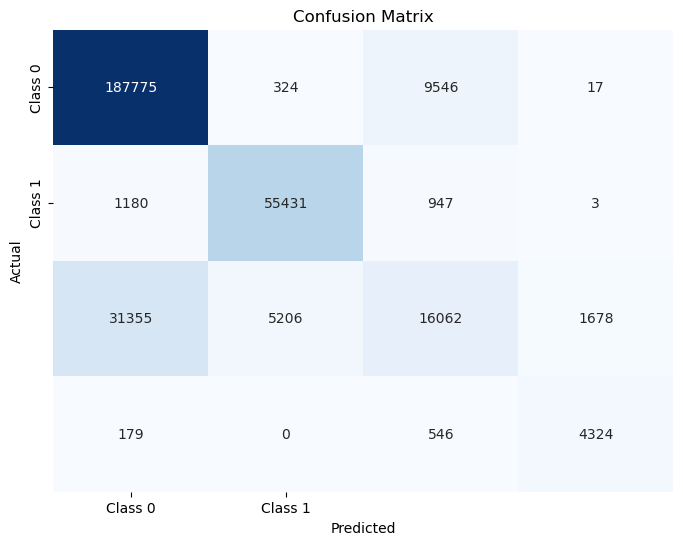

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [6]:
from sklearn.metrics import confusion_matrix

# Confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Random forest:")
print(conf_matrix)
from sklearn.metrics import classification_report

# Classification report on the test set
class_report = classification_report(y_test, y_pred)
print("Classification Report for Random Forest:")
print(class_report)



Confusion Matrix for Random forest:
[[187775    324   9546     17]
 [  1180  55431    947      3]
 [ 31355   5206  16062   1678]
 [   179      0    546   4324]]
Classification Report for Random Forest:
              precision    recall  f1-score   support

    Approved       0.85      0.95      0.90    197662
    Canceled       0.91      0.96      0.94     57561
     Refused       0.59      0.30      0.39     54301
Unused offer       0.72      0.86      0.78      5049

    accuracy                           0.84    314573
   macro avg       0.77      0.77      0.75    314573
weighted avg       0.82      0.84      0.82    314573



In [7]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'classifier__n_estimators': randint(50, 200),
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(pipeline, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_random = best_model_random.predict(X_test)
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print('Accuracy on the test set with best model from random search: {:.2f}'.format(accuracy_best_random))


KeyboardInterrupt: 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

# Assuming df is your DataFrame containing the data
# Note: Make sure to replace 'appdf' with 'df' if that's the correct DataFrame name

# Define features (X) and target variable (y)
X = appdf[['NAME_CONTRACT_TYPE_y', 'NAME_CLIENT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
        'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'OCCUPATION_TYPE',
        'NAME_GOODS_CATEGORY', 'PRODUCT_COMBINATION', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE',
        'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE', 'Age Group', 'Work Experience',
        'AMT_CREDIT_Range', 'AMT_INCOME_TOTAL_Range']]

y = appdf['NAME_CONTRACT_STATUS']

# Identify categorical columns
categorical_cols = ['NAME_CONTRACT_TYPE_y', 'NAME_CLIENT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE',
                    'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_PORTFOLIO', 'OCCUPATION_TYPE',
                    'NAME_GOODS_CATEGORY', 'PRODUCT_COMBINATION', 'NAME_PAYMENT_TYPE', 'CHANNEL_TYPE',
                    'NAME_YIELD_GROUP', 'NAME_HOUSING_TYPE']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_cols)
    ])

# Create a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Create a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the classifier on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f'Accuracy on the test set: {accuracy_test:.2f}')

# Calculate and print the accuracy on the training set
accuracy_train = accuracy_score(y_train, pipeline.predict(X_train))
print(f'Accuracy on the training set: {accuracy_train:.2f}')


Accuracy on the test set: 0.83
Accuracy on the training set: 0.87


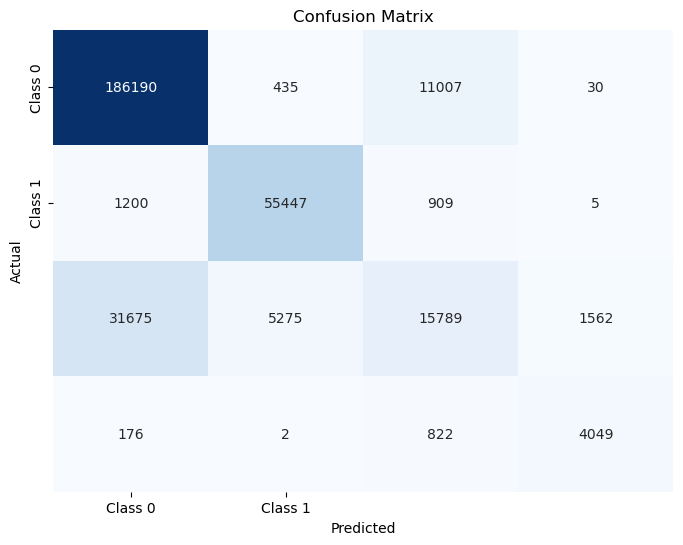

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Decision Tree:")
print(conf_matrix)
from sklearn.metrics import classification_report

# Classification report on the test set
class_report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:")
print(class_report)



Confusion Matrix for Decision Tree:
[[186190    435  11007     30]
 [  1200  55447    909      5]
 [ 31675   5275  15789   1562]
 [   176      2    822   4049]]
Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Approved       0.85      0.94      0.89    197662
    Canceled       0.91      0.96      0.93     57561
     Refused       0.55      0.29      0.38     54301
Unused offer       0.72      0.80      0.76      5049

    accuracy                           0.83    314573
   macro avg       0.76      0.75      0.74    314573
weighted avg       0.81      0.83      0.81    314573



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameter distribution
param_dist = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': randint(1, 20),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 10)
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_random = best_model_random.predict(X_test)
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print('Accuracy on the test set with the best model from random search: {:.2f}'.format(accuracy_best_random))


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your data (replace 'your_data.csv' with your actual CSV file)
data_path = r"C:\Users\PRASHANTH\Desktop\finalds\appdata_mergefinal11.csv"
df = pd.read_csv(data_path)

# Assuming 'NAME_CONTRACT_STATUS' is your target column
X = df.drop('NAME_CONTRACT_STATUS', axis=1)
y = df['NAME_CONTRACT_STATUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify numeric and categorical columns
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Create transformers
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Append classifier to the preprocessor
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('classifier', LogisticRegression())])

# Train the model on the training set
model_pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = model_pipeline.predict(X_test)
y_train_pred = model_pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate accuracy on the test set
y_test_pred = model_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy:.2f}')
print(f'Test Accuracy: {test_accuracy:.2f}')


c:\Users\PRASHANTH\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.82
Test Accuracy: 0.82


In [ ]:
from sklearn.metrics import confusion_matrix

# Confusion matrix on the test set
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for Logistic Regression:")
print(conf_matrix)
from sklearn.metrics import classification_report

# Classification report on the test set
class_report = classification_report(y_test, y_pred)
print("Classification Report for Logistic Regression:")
print(class_report)

# Misclassified instances
misclassified_df = X_test.copy()
misclassified_df['Actual'] = y_test
misclassified_df['Predicted'] = y_pred
misclassified_df = misclassified_df[misclassified_df['Actual'] != misclassified_df['Predicted']]
print("Misclassified Instances:")
print(misclassified_df)




Confusion Matrix for Logistic Regression:
[[127035      3   3227   1242]
 [  1114  37007    332     43]
 [ 25972   3677   5799    872]
 [  1198     59      2   2133]]
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Approved       0.82      0.97      0.89    131507
    Canceled       0.91      0.96      0.93     38496
     Refused       0.62      0.16      0.25     36320
Unused offer       0.50      0.63      0.56      3392

    accuracy                           0.82    209715
   macro avg       0.71      0.68      0.66    209715
weighted avg       0.79      0.82      0.78    209715

Misclassified Instances:
        NAME_CONTRACT_TYPE_y NAME_CLIENT_TYPE CODE_GENDER  \
662460        Consumer loans        Refreshed           F   
280139            Cash loans         Repeater           F   
658472        Consumer loans         Repeater           F   
700377        Consumer loans         Repeater           F   
880383            Cas

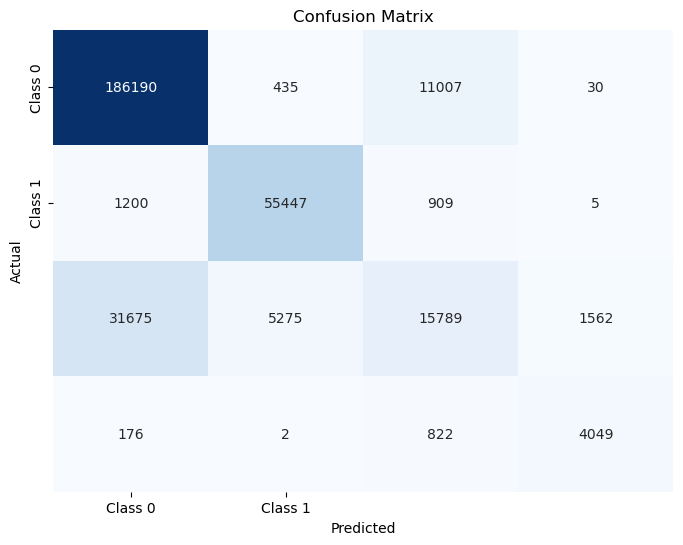

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define the hyperparameter distribution
param_dist = {
    'classifier__C': loguniform(1e-4, 1e4),
    'classifier__penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'classifier__max_iter': [100, 200, 300, 400, 500]
}

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=5, 
    scoring='accuracy', 
    random_state=42
)

# Fit the random search to the data
random_search.fit(X_train, y_train)

# Print the best parameters and corresponding accuracy
print("Best Parameters: ", random_search.best_params_)
print("Best Accuracy: {:.2f}".format(random_search.best_score_))

# Get the best model from random search
best_model_random = random_search.best_estimator_

# Evaluate the best model on the test set
y_pred_best_random = best_model_random.predict(X_test)
accuracy_best_random = accuracy_score(y_test, y_pred_best_random)
print('Accuracy on the test set with the best model from random search: {:.2f}'.format(accuracy_best_random))


KeyboardInterrupt: 